In [24]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [25]:
img = cv2.imread('./testdata/ex.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
guidance = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w, ch = img.shape
h, w

(316, 316)

In [26]:
img = cv2.imread('./testdata/ex.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
guidance = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
BORDER_TYPE = cv2.BORDER_REFLECT
sigma_s = 3
sigma_r = 0.1
padded_img = cv2.copyMakeBorder(img, 3*sigma_s, 3*sigma_s, 3*sigma_s, 3*sigma_s, BORDER_TYPE).astype(np.int32)
padded_guidance = cv2.copyMakeBorder(guidance, 3*sigma_s, 3*sigma_s, 3*sigma_s, 3*sigma_s, BORDER_TYPE).astype(np.int32)


((316, 316), (334, 334))

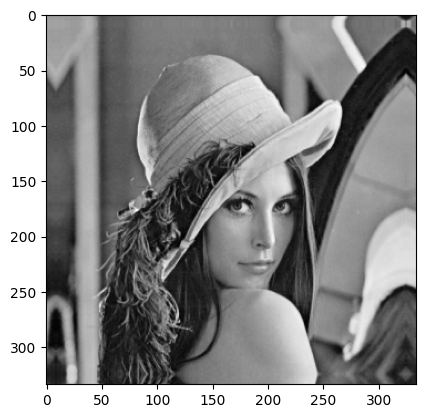

In [27]:
plt.imshow(padded_guidance, cmap='gray')
guidance.shape, padded_guidance.shape

((316, 316, 3), (334, 334, 3))

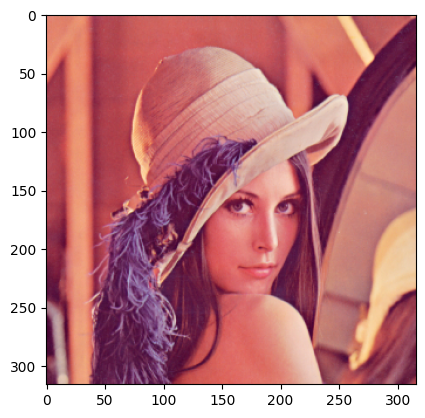

In [28]:
plt.imshow(img_rgb)
img_rgb.shape, padded_img.shape

In [29]:
padded_guidance / 255

array([[0.60392157, 0.61568627, 0.61176471, ..., 0.22352941, 0.30196078,
        0.41568627],
       [0.60784314, 0.61568627, 0.61568627, ..., 0.32156863, 0.42352941,
        0.49411765],
       [0.60784314, 0.61568627, 0.61568627, ..., 0.40784314, 0.47058824,
        0.50588235],
       ...,
       [0.31372549, 0.2627451 , 0.24705882, ..., 0.22745098, 0.22745098,
        0.21960784],
       [0.32941176, 0.27843137, 0.25490196, ..., 0.22745098, 0.23137255,
        0.21960784],
       [0.37254902, 0.30588235, 0.30980392, ..., 0.23529412, 0.22745098,
        0.23137255]])

In [30]:
pad_w = 3 * sigma_s
interval = np.arange(-pad_w, pad_w + 1)
x_s, y_s = np.meshgrid(interval, interval)
x_s, y_s

(array([[-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,
          7,  8,  9],
        [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  

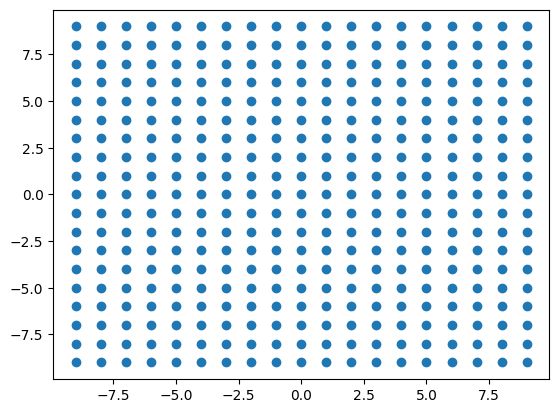

In [31]:
plt.scatter(x_s, y_s)
plt.show()

In [32]:
spatial_kernel = (x_s ** 2 + y_s ** 2) * 0.5 * sigma_s ** 2
spatial_kernel

array([[729. , 652.5, 585. , 526.5, 477. , 436.5, 405. , 382.5, 369. ,
        364.5, 369. , 382.5, 405. , 436.5, 477. , 526.5, 585. , 652.5,
        729. ],
       [652.5, 576. , 508.5, 450. , 400.5, 360. , 328.5, 306. , 292.5,
        288. , 292.5, 306. , 328.5, 360. , 400.5, 450. , 508.5, 576. ,
        652.5],
       [585. , 508.5, 441. , 382.5, 333. , 292.5, 261. , 238.5, 225. ,
        220.5, 225. , 238.5, 261. , 292.5, 333. , 382.5, 441. , 508.5,
        585. ],
       [526.5, 450. , 382.5, 324. , 274.5, 234. , 202.5, 180. , 166.5,
        162. , 166.5, 180. , 202.5, 234. , 274.5, 324. , 382.5, 450. ,
        526.5],
       [477. , 400.5, 333. , 274.5, 225. , 184.5, 153. , 130.5, 117. ,
        112.5, 117. , 130.5, 153. , 184.5, 225. , 274.5, 333. , 400.5,
        477. ],
       [436.5, 360. , 292.5, 234. , 184.5, 144. , 112.5,  90. ,  76.5,
         72. ,  76.5,  90. , 112.5, 144. , 184.5, 234. , 292.5, 360. ,
        436.5],
       [405. , 328.5, 261. , 202.5, 153. , 112.5,  8

In [42]:
%%timeit
-0.5 * 3 ** -2

9.1 ns ± 0.273 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [68]:
A = np.arange(36).reshape(3, 3, 4) 
B = np.arange(12).reshape(1, 3, 4)
print(A)
print(B)
A*B

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]


array([[[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]],

       [[  0,  13,  28,  45],
        [ 64,  85, 108, 133],
        [160, 189, 220, 253]],

       [[  0,  25,  52,  81],
        [112, 145, 180, 217],
        [256, 297, 340, 385]]])

In [70]:
A*B

array([[[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]],

       [[  0,  13,  28,  45],
        [ 64,  85, 108, 133],
        [160, 189, 220, 253]],

       [[  0,  25,  52,  81],
        [112, 145, 180, 217],
        [256, 297, 340, 385]]])

In [78]:
%%timeit
(np.arange(256) / 255) ** 2

4.38 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [83]:
%%timeit
np.arange(256)[:10]

1.04 µs ± 18.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [86]:
cv2.COLOR_BGR2GRAY

6